In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Read both sheets from the Excel file
file_path = 'Multiplex.co Superstore Dataset.xlsx'

# Load the 'Customers' and 'Orders' sheets
df_customers = pd.read_excel(file_path, sheet_name='Customers')
df_orders = pd.read_excel(file_path, sheet_name='Orders')

# Display the shape of both datasets
print("Customers Sheet Shape:", df_customers.shape)
print("Orders Sheet Shape:", df_orders.shape)

# Show the first 5 rows of each sheet to get a sense of the data
print("\nFirst 5 rows from Customers Sheet:")
display(df_customers.head())

print("\nFirst 5 rows from Orders Sheet:")
display(df_orders.head())

# Check the column names and data types
print("\n Customers Data Types:")
print(df_customers.dtypes)

print("\n Orders Data Types:")
print(df_orders.dtypes)


Customers Sheet Shape: (400, 4)
Orders Sheet Shape: (1921, 8)

First 5 rows from Customers Sheet:


,Customer_ID,Signup_Date,Monthly_Spend,Score
0,CUST0001,02-12-2023,1935.246582,30
1,CUST0002,"April 18, 2023",4758.500101,61
2,CUST0003,"August 29, 2023",3686.770315,48
3,CUST0004,"June 12, 2022",3033.426573,52
4,CUST0005,06-04-2022,864.491338,35



First 5 rows from Orders Sheet:


,Customer_ID,Order_ID,Amount,Category,Order_Date,City,Country,Age
0,CUST0001,7d1e2573-d981-4ffd-b13b-58032e41aab8,£696.09,Clothing,23/04/2024,Islamabad,Pakistan,41
1,CUST0001,794dc612-03f1-4db1-94ee-59b666c391bc,£395.07,Books,10/03/2025,Manchester,UK,62
2,CUST0001,e7b22bf1-51f3-4441-b72e-f71bbcf9134f,PKR 716.70,Clothing,30-04-2024,Islamabad,Pakistan,52
3,CUST0001,00eaae19-13ee-4c11-9bee-388d7341f0d2,$641.89,Electronics,30/01/2024,Islamabad,Pakistan,65
4,CUST0001,92764b03-c524-4ef6-be43-ec8b629520e5,PKR 345.92,Fitness,23-03-2025,Lahore,Pakistan,23



 Customers Data Types:
Customer_ID       object
Signup_Date       object
Monthly_Spend    float64
Score              int64
dtype: object

 Orders Data Types:
Customer_ID    object
Order_ID       object
Amount         object
Category       object
Order_Date     object
City           object
Country        object
Age             int64
dtype: object


In [2]:
import re

# Define a function to extract meaningful numeric part from Customer_ID
def clean_customer_id(val):
    # Extract digits only
    digits = re.sub(r'\D', '', str(val))
    # Remove leading zeros and convert to int (if digits exist)
    return int(digits.lstrip('0')) if digits else None

# Apply the function to both dataframes
df_customers['Customer_ID'] = df_customers['Customer_ID'].apply(clean_customer_id)
df_orders['Customer_ID'] = df_orders['Customer_ID'].apply(clean_customer_id)

# Check the result
print("Cleaned Customer_IDs in Customers DataFrame:")
print(df_customers['Customer_ID'].head())

print("\nCleaned Customer_IDs in Orders DataFrame:")
print(df_orders['Customer_ID'].head())

Cleaned Customer_IDs in Customers DataFrame:
0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: Customer_ID, dtype: float64

Cleaned Customer_IDs in Orders DataFrame:
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Customer_ID, dtype: float64


In [3]:
df_customers['Signup_Date'].dropna().unique()[:10]

array(['02-12-2023', 'April 18, 2023', 'August 29, 2023', 'June 12, 2022',
       '06-04-2022', '01-08-2023', '06-06-2023', 'June 11, 2022',
       'May 23, 2022', 'September 27, 2022'], dtype=object)

In [4]:
from datetime import datetime

def parse_mixed_dates(date_str):
    """
    Attempts to parse a date string in either 'Month dd, yyyy' or 'dd-mm-yyyy' format.
    Returns NaT if parsing fails.
    """
    if pd.isnull(date_str):
        return pd.NaT

    date_str = str(date_str).strip()  # Remove extra spaces

    try:
        return datetime.strptime(date_str, '%B %d, %Y')  # e.g., April 18, 2023
    except ValueError:
        pass
    try:
        return datetime.strptime(date_str, '%d-%m-%Y')   # e.g., 02-12-2023
    except ValueError:
        return pd.NaT


In [5]:
df_customers['Signup_Date'] = df_customers['Signup_Date'].apply(parse_mixed_dates)
print("Invalid Signup Dates:",df_customers['Signup_Date'].isna().sum())
print(df_customers['Signup_Date'].head())

Invalid Signup Dates: 0
0   2023-12-02
1   2023-04-18
2   2023-08-29
3   2022-06-12
4   2022-04-06
Name: Signup_Date, dtype: datetime64[ns]


In [6]:
df_orders['Order_Date'].dropna().unique()[:10]

array(['23/04/2024', '10/03/2025', '30-04-2024', '30/01/2024',
       '23-03-2025', '17/07/2023', '23-05-2023', '14/02/2024',
       '12-02-2024', '27/12/2024'], dtype=object)

In [7]:
def parse_order_date(date_str):
    """
    Parses a date string in either 'dd-mm-yyyy' or 'dd/mm/yyyy' format.
    Returns NaT if it fails.
    """
    if pd.isnull(date_str):
        return pd.NaT

    date_str = str(date_str).strip()

    for fmt in ('%d-%m-%Y', '%d/%m/%Y'):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    return pd.NaT


In [8]:
df_orders['Order_Date'] = df_orders['Order_Date'].apply(parse_order_date)

In [9]:
print("Invalid Signup Dates:", df_orders['Order_Date'].isna().sum())
print(df_orders['Order_Date'].head())

Invalid Signup Dates: 0
0   2024-04-23
1   2025-03-10
2   2024-04-30
3   2024-01-30
4   2025-03-23
Name: Order_Date, dtype: datetime64[ns]


Date columns from both tables have been cleaned.

In [10]:
import re

def convert_to_pound(value):
    if pd.isnull(value):
        return np.nan

    value = str(value).strip()

    # Check currency and extract numeric value
    if 'PKR' in value.upper():
        amount = float(re.sub(r'[^\d.]', '', value))
        return round(amount / 350, 2)
    elif '$' in value:
        amount = float(re.sub(r'[^\d.]', '', value))
        return round(amount / 1.25, 2)
    elif '£' in value or 'GBP' in value.upper():
        amount = float(re.sub(r'[^\d.]', '', value))
        return round(amount, 2)
    else:
        # Unknown currency, treat as missing
        return np.nan


In [11]:
df_orders['Amount_GBP'] = df_orders['Amount'].apply(convert_to_pound)

In [25]:
df_orders.drop('Amount', axis=1, inplace=True)
df_orders['Amount_GBP'].head()

,Amount_GBP
0,696.09
1,395.07
2,2.05
3,513.51
4,0.99


Currencies have been standardized to GBP. (Rough Estimates)

In [37]:
# Check missing values in customers data
print("Missing values in Customers sheet:")
print(df_customers.isnull().sum())

print("\nMissing values in Orders sheet:")
print(df_orders.isnull().sum())

Missing values in Customers sheet:
Customer_ID      0
Signup_Date      0
Monthly_Spend    0
Score            0
Age              0
dtype: int64

Missing values in Orders sheet:
Customer_ID    0
Order_ID       0
Category       0
Order_Date     0
City           0
Country        0
Amount_GBP     0
dtype: int64


In [14]:
df_customers['Customer_ID'] = df_customers['Customer_ID'].fillna(method='ffill').astype(int)


<ipython-input-14-3a0c7e28a176>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_customers['Customer_ID'] = df_customers['Customer_ID'].fillna(method='ffill').astype(int)


In [16]:
print("Should be no missing values now:")
print(df_customers.isnull().sum())

Should be no missing values now:
Customer_ID      0
Signup_Date      0
Monthly_Spend    0
Score            0
dtype: int64


In [22]:
# Drop rows where Customer_ID or Order_ID is missing
df_orders.dropna(subset=['Customer_ID', 'Order_ID'], inplace=True)

In [27]:
# Fill missing 'City' values based on most frequent city in each country
df_orders['City'] = df_orders.groupby('Country')['City'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)

In [28]:
# Fill missing 'Country' values based on most frequent country for each city
df_orders['Country'] = df_orders.groupby('City')['Country'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)

In [36]:
from scipy.stats import skew

def fill_amount_gbp(group):
    if group['Amount_GBP'].isna().sum() == 0:
        return group

    skewness = skew(group['Amount_GBP'].dropna())

    if -0.5 <= skewness <= 0.5:
        filler = group['Amount_GBP'].mean()
    else:
        filler = group['Amount_GBP'].median()

    group['Amount_GBP'] = group['Amount_GBP'].fillna(filler)
    return group

# Apply group-wise fill
df_orders = df_orders.groupby('Category').apply(fill_amount_gbp).reset_index(drop=True)


<ipython-input-36-ca9992e30b33>:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_orders = df_orders.groupby('Category').apply(fill_amount_gbp).reset_index(drop=True)


In [41]:
print(df_orders.dtypes)
print(df_customers.dtypes)

Customer_ID             int64
Order_ID               object
Category               object
Order_Date     datetime64[ns]
City                   object
Country                object
Amount_GBP            float64
dtype: object
Customer_ID               int64
Signup_Date      datetime64[ns]
Monthly_Spend           float64
Score                     int64
Age                       int64
dtype: object


In [40]:
df_customers['Customer_ID'] = df_customers['Customer_ID'].astype(int)
df_orders['Customer_ID'] = df_orders['Customer_ID'].astype(int)

Now data cleaning is done. The nulls have been dealt with and the data types have been corrected.

Time for some linear regression. We will create a model that predicts score of customer based on their signup date and monthly spend.

In [42]:
df_customers['Signup_Date_Num'] = df_customers['Signup_Date'].map(pd.Timestamp.toordinal)


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = df_customers[['Signup_Date_Num', 'Monthly_Spend']]
y = df_customers['Score']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [45]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 21.86
R² Score: 0.9519


In [46]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


                 Coefficient
Signup_Date_Num    -0.034611
Monthly_Spend       0.010299


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Optional: Set seaborn theme
sns.set(style="whitegrid")


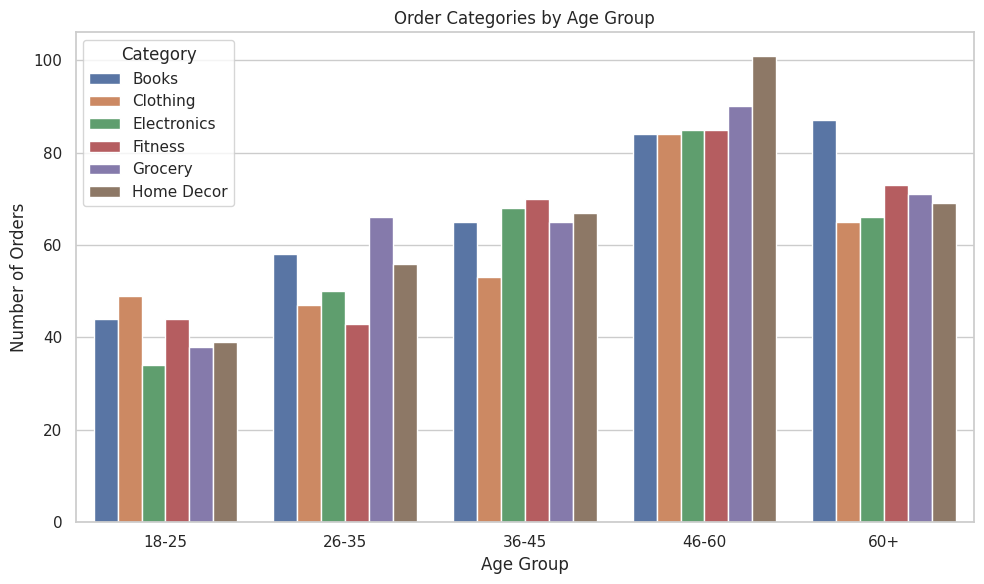

In [48]:
# Create age groups
bins = [18, 25, 35, 45, 60, 100]
labels = ['18-25', '26-35', '36-45', '46-60', '60+']
df_customers['Age_Group'] = pd.cut(df_customers['Age'], bins=bins, labels=labels, right=False)

# Merge necessary columns for analysis
merged = pd.merge(df_orders, df_customers[['Customer_ID', 'Age_Group']], on='Customer_ID', how='left')

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=merged, x='Age_Group', hue='Category')
plt.title("Order Categories by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Orders")
plt.legend(title='Category')
plt.tight_layout()
plt.show()


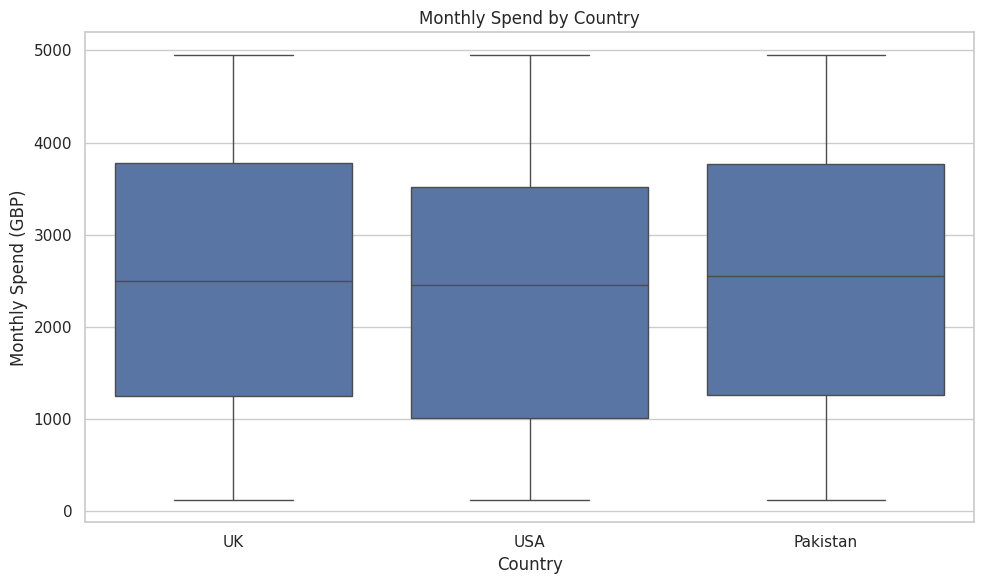

In [50]:
# Merge needed
merged_df = pd.merge(df_orders[['Customer_ID', 'Country']],
                     df_customers[['Customer_ID', 'Monthly_Spend']],
                     on='Customer_ID', how='left')

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='Country', y='Monthly_Spend')
plt.title("Monthly Spend by Country")
plt.ylabel("Monthly Spend (GBP)")
plt.xlabel("Country")
plt.tight_layout()
plt.show()


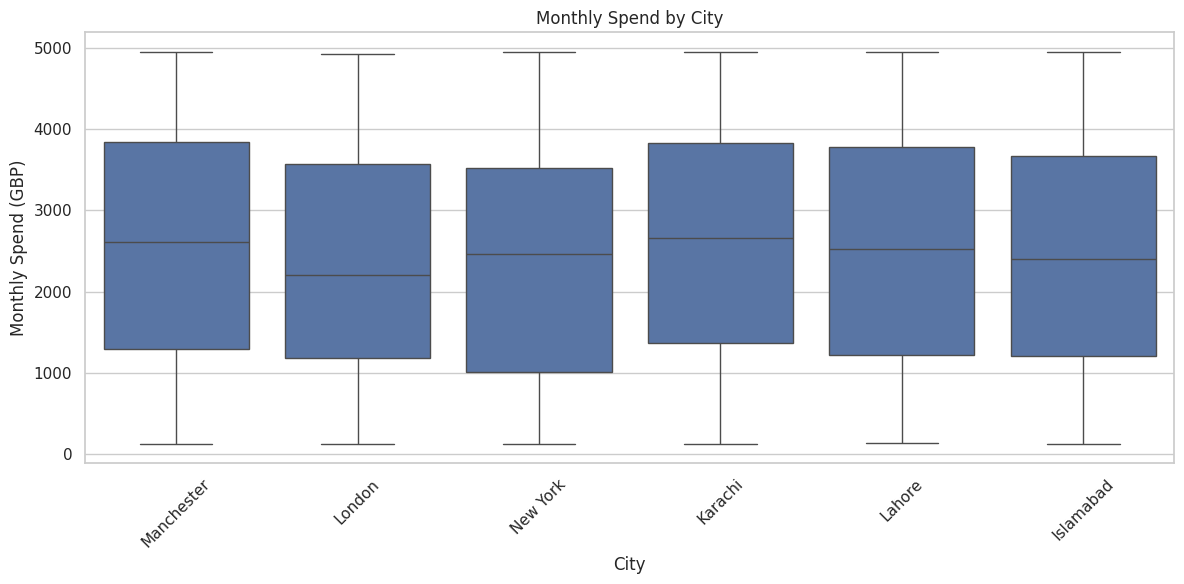

In [51]:
merged_df = pd.merge(df_orders[['Customer_ID', 'City']],
                     df_customers[['Customer_ID', 'Monthly_Spend']],
                     on='Customer_ID', how='left')

plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='City', y='Monthly_Spend')
plt.title("Monthly Spend by City")
plt.ylabel("Monthly Spend (GBP)")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


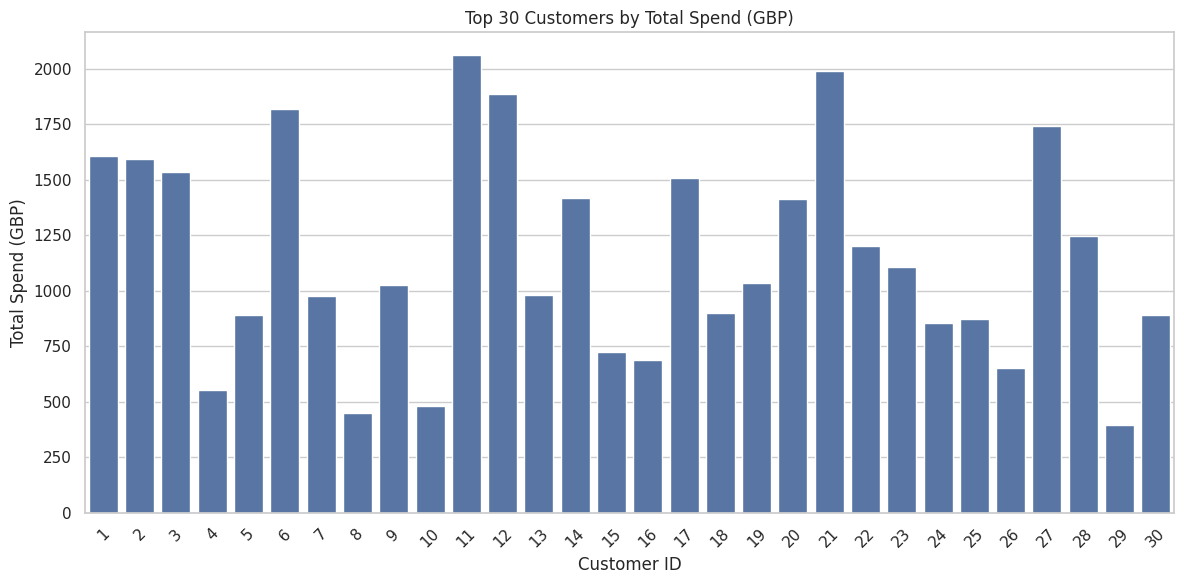

In [52]:
cust_sum = df_orders.groupby('Customer_ID')['Amount_GBP'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=cust_sum.head(30), x='Customer_ID', y='Amount_GBP')  # limit to 30 for visibility
plt.title("Top 30 Customers by Total Spend (GBP)")
plt.ylabel("Total Spend (GBP)")
plt.xlabel("Customer ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


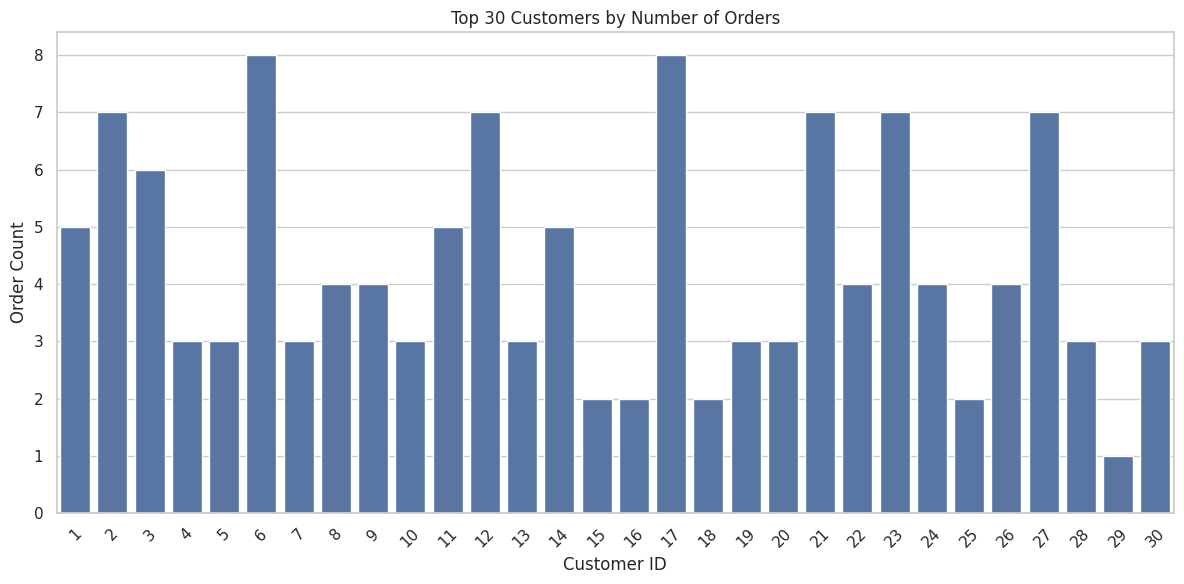

In [53]:
cust_count = df_orders.groupby('Customer_ID').size().reset_index(name='Order_Count')

plt.figure(figsize=(12, 6))
sns.barplot(data=cust_count.head(30), x='Customer_ID', y='Order_Count')  # limit to 30 for visibility
plt.title("Top 30 Customers by Number of Orders")
plt.ylabel("Order Count")
plt.xlabel("Customer ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [56]:
import plotly.express as px

# Order counts per country
country_counts = df_orders['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Order_Count']

fig = px.choropleth(country_counts,
                    locations="Country",
                    locationmode="country names",
                    color="Order_Count",
                    color_continuous_scale="Blues",
                    title="Number of Orders by Country")
fig.show()


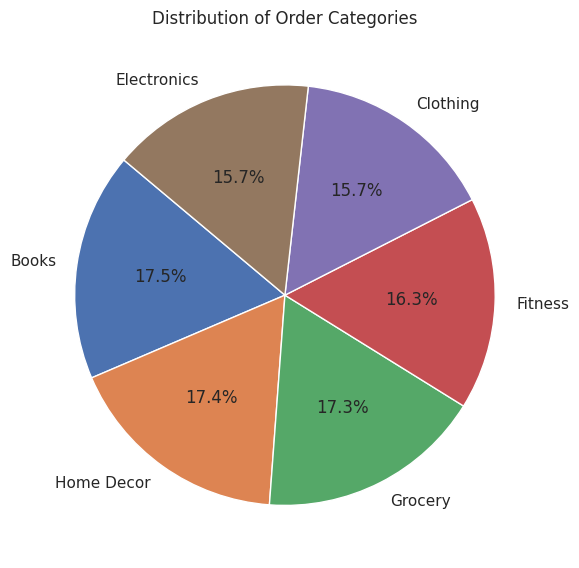

In [57]:
category_counts = df_orders['Category'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Order Categories")
plt.tight_layout()
plt.show()


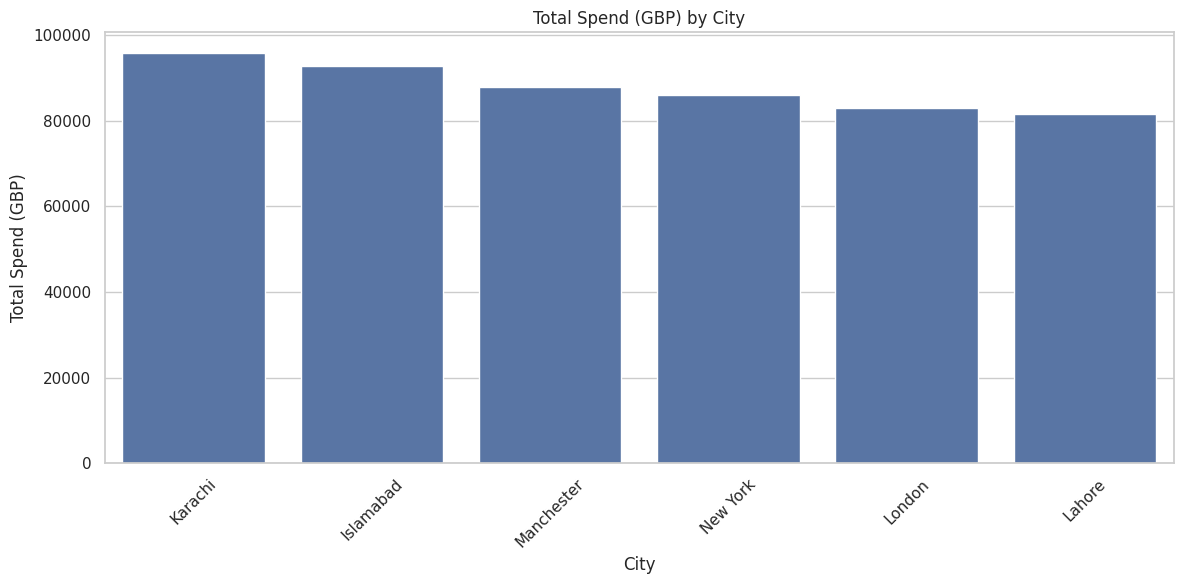

In [54]:
city_sum = df_orders.groupby('City')['Amount_GBP'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=city_sum.sort_values('Amount_GBP', ascending=False), x='City', y='Amount_GBP')
plt.title("Total Spend (GBP) by City")
plt.ylabel("Total Spend (GBP)")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


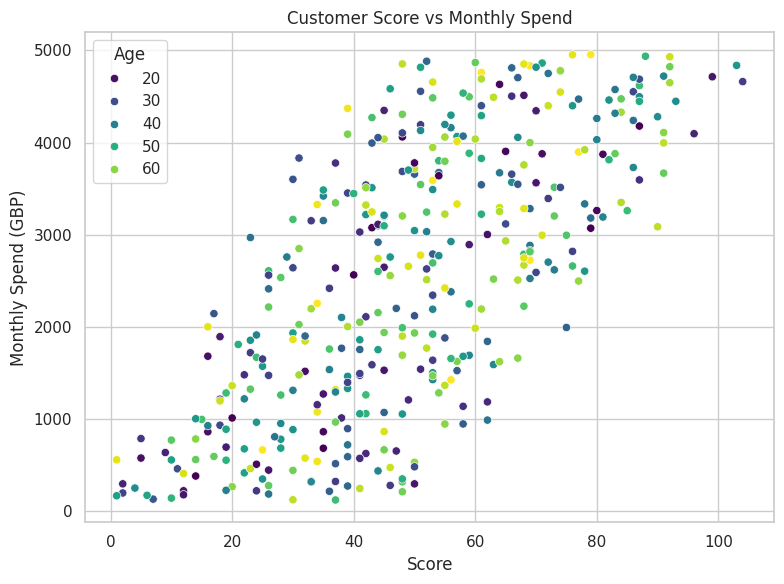

In [58]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_customers, x='Score', y='Monthly_Spend', hue='Age', palette='viridis')
plt.title("Customer Score vs Monthly Spend")
plt.xlabel("Score")
plt.ylabel("Monthly Spend (GBP)")
plt.tight_layout()
plt.show()


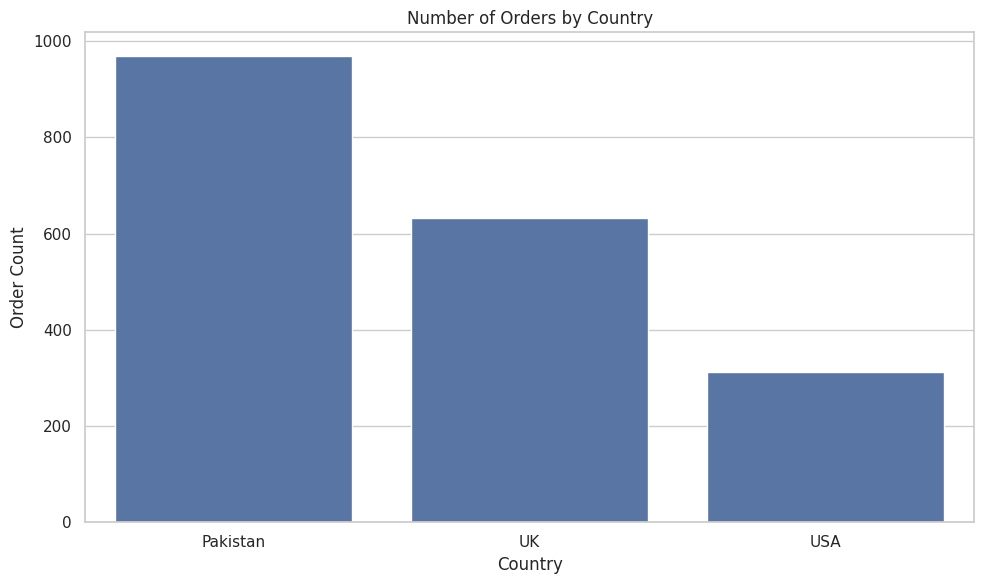

In [55]:
country_orders = df_orders['Country'].value_counts().reset_index()
country_orders.columns = ['Country', 'Order_Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=country_orders, x='Country', y='Order_Count')
plt.title("Number of Orders by Country")
plt.ylabel("Order Count")
plt.xlabel("Country")
plt.tight_layout()
plt.show()


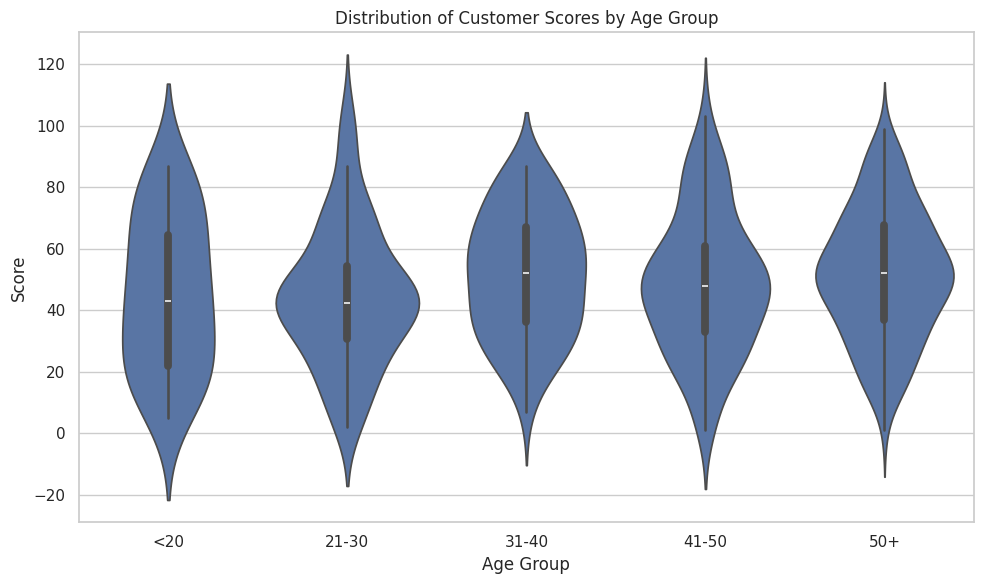

In [59]:
df_customers['Age_Group'] = pd.cut(df_customers['Age'], bins=[0, 20, 30, 40, 50, 100],
                                   labels=['<20', '21-30', '31-40', '41-50', '50+'])

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_customers, x='Age_Group', y='Score')
plt.title("Distribution of Customer Scores by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Score")
plt.tight_layout()
plt.show()


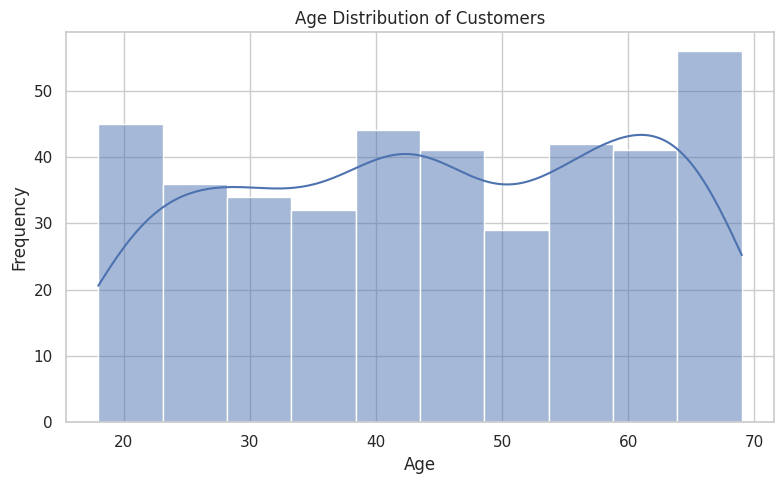

In [61]:
plt.figure(figsize=(8, 5))
sns.histplot(df_customers['Age'], bins=10, kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


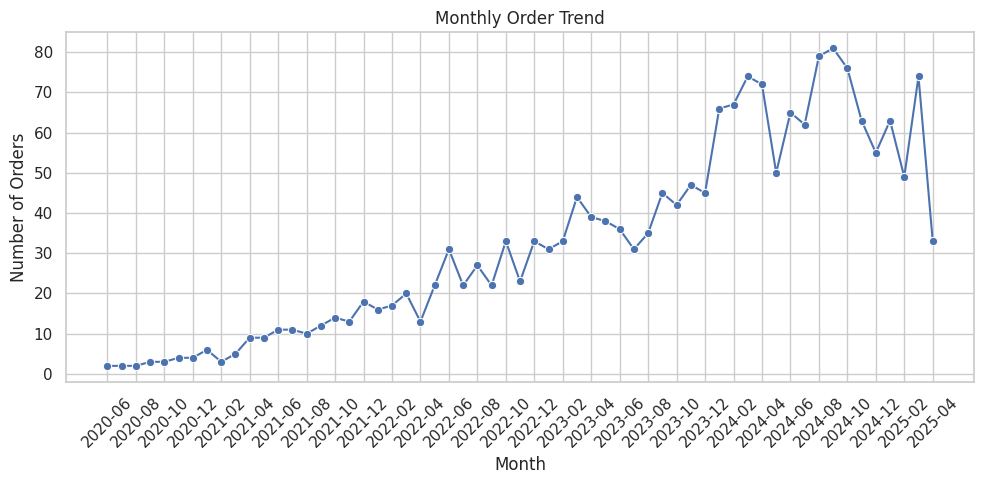

In [63]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_trend, x='Order_Month', y='Order_Count', marker='o')
plt.title("Monthly Order Trend")
plt.xlabel("Month")
plt.ylabel("Number of Orders")

# Reduce number of x-axis labels shown
xticks = monthly_trend['Order_Month']
plt.xticks(ticks=range(0, len(xticks), 2), labels=xticks[::2], rotation=45)

plt.tight_layout()
plt.show()


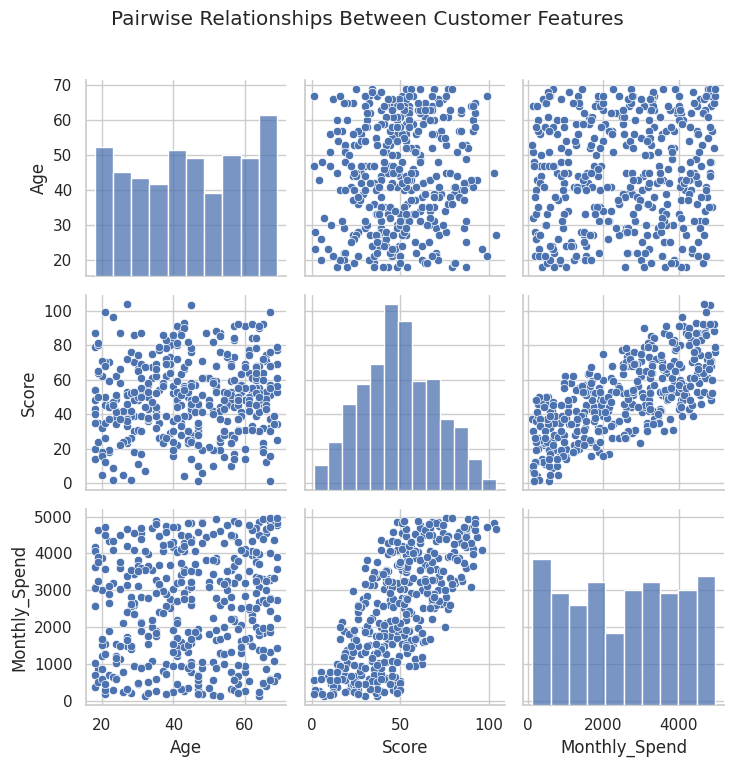

In [64]:
sns.pairplot(df_customers[['Age', 'Score', 'Monthly_Spend']])
plt.suptitle("Pairwise Relationships Between Customer Features", y=1.02)
plt.tight_layout()
plt.show()
